In [1]:
from sklearn.datasets import fetch_california_housing
df=fetch_california_housing(as_frame=True).frame

In [2]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor()

TypeError: variance_inflation_factor() missing 2 required positional arguments: 'exog' and 'exog_idx'

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
X=df.drop('MedHouseVal',axis=1)
vif_list=[]
for i in range(len(X.columns)):
    vif_list.append(variance_inflation_factor(X.values,i))
vif_data=pd.DataFrame(vif_list,
                     index=X.columns,
                     columns=['VIF'])

In [8]:
vif_data

,VIF
MedInc,11.511140
HouseAge,7.195917
AveRooms,45.993601
AveBedrms,43.590314
Population,2.935745
AveOccup,1.095243
Latitude,559.874071
Longitude,633.711654


In [9]:
d=vif_data.sort_values(by='VIF',ascending=False)
d[d['VIF']<15].index

Index(['MedInc', 'HouseAge', 'Population', 'AveOccup'], dtype='object')

In [10]:
final_cols=['MedInc','HouseAge','Population','AveOccup','Latitude','AveRooms','MedHouseVal']

In [11]:
final_df=df[final_cols]
final_df

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms,MedHouseVal
0,8.3252,41.0,322.0,2.555556,37.88,6.984127,4.526
1,8.3014,21.0,2401.0,2.109842,37.86,6.238137,3.585
2,7.2574,52.0,496.0,2.802260,37.85,8.288136,3.521
3,5.6431,52.0,558.0,2.547945,37.85,5.817352,3.413
4,3.8462,52.0,565.0,2.181467,37.85,6.281853,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,39.48,5.045455,0.781
20636,2.5568,18.0,356.0,3.122807,39.49,6.114035,0.771
20637,1.7000,17.0,1007.0,2.325635,39.43,5.205543,0.923
20638,1.8672,18.0,741.0,2.123209,39.43,5.329513,0.847


In [12]:
from sklearn.preprocessing import MinMaxScaler

x=final_df.drop('MedHouseVal',axis=1)
y=final_df['MedHouseVal']

In [13]:
mms=MinMaxScaler()
scaled_df=pd.DataFrame()
scaled_df[x.columns]=mms.fit_transform(x)
scaled_df['MedHouseVal']=y
scaled_df

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms,MedHouseVal
0,0.539668,0.784314,0.008941,0.001499,0.567481,0.043512,4.526
1,0.538027,0.392157,0.067210,0.001141,0.565356,0.038224,3.585
2,0.466028,1.000000,0.013818,0.001698,0.564293,0.052756,3.521
3,0.354699,1.000000,0.015555,0.001493,0.564293,0.035241,3.413
4,0.230776,1.000000,0.015752,0.001198,0.564293,0.038534,3.422
...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.023599,0.001503,0.737513,0.029769,0.781
20636,0.141853,0.333333,0.009894,0.001956,0.738576,0.037344,0.771
20637,0.082764,0.313725,0.028140,0.001314,0.732200,0.030904,0.923
20638,0.094295,0.333333,0.020684,0.001152,0.732200,0.031783,0.847


## Model development

In [14]:
X=scaled_df.drop('MedHouseVal',axis=1)
y=scaled_df['MedHouseVal']

In [15]:
print(scaled_df.shape)
print(X.shape)
print(y.shape)

(20640, 7)
(20640, 6)
(20640,)


$train-test-split$

In [16]:
# data divide into 4 parts
#X_train,y_train
#X_test,y_test
#Model develop on  X_train,y_train
#Model test by passing X_test will give y_pred
# Y_pred compare with y_test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)#Stratify is their it is  flase if it ture or you want to use we will use it 
#Stratify:it will take a column name as input and divide the data bassed on  that column
#for ig if in eductaion it is ug ug ug ug pg pg and if model is train and it just see ug ug ug while traning and if it get pg while runing it will not predict properly
#so we will use stratify and say check eductatuion while dividing so it will take dome from ug ug pg like it

In [19]:
# Train:16512 test:4128
#X_train:(16512,6)
#y_train:(16512,)
#X_test:(4128,6)
#y_test: (4128,)


In [20]:
scaled_df.shape

(20640, 7)

In [21]:
X_train.shape

(16512, 6)

In [22]:
y_train.shape

(16512,)

In [23]:

X_test.shape

(4128, 6)

In [24]:
y_test.shape

(4128,)

In [25]:
X_train

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms
17595,0.197811,0.764706,0.020068,0.001340,0.506908,0.036861
6073,0.731562,0.607843,0.008184,0.001942,0.162593,0.050788
6251,0.249590,0.607843,0.037081,0.002736,0.159405,0.026974
3161,0.087288,0.490196,0.034166,0.001932,0.285866,0.023417
1887,0.182763,0.509804,0.028224,0.001480,0.678002,0.041653
...,...,...,...,...,...,...
8222,0.310347,0.392157,0.000729,0.000901,0.129649,0.015712
9449,0.155384,0.254902,0.032232,0.001400,0.515409,0.035040
8471,0.255748,0.627451,0.029990,0.001953,0.145590,0.029632
17048,0.427987,0.843137,0.034530,0.001526,0.523911,0.038914


In [26]:
y_train

17595    2.35200
6073     5.00001
6251     1.63300
3161     0.68000
1887     0.86900
          ...   
8222     0.87500
9449     1.11100
8471     1.80500
17048    4.95900
1318     2.05100
Name: MedHouseVal, Length: 16512, dtype: float64

$model-development$

In [27]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [28]:





# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PowerTransformer
# from sklearn.impute import KNNImpute
# from sklearn.model_selection import train_test_split
# from skelarn.linera_model import LinearRegression
#from sklearn.tree import DecisionTReeClassifier
#from sklearn.neighbors import KNeighborsClassifier
# from sklearn.navie_bates
#from sklearn.ensemble
# from skleran.metrics

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=lr.predict(X_test)

In [31]:
y_pred

array([2.30473678, 3.26212585, 2.25235989, ..., 1.39434401, 2.39395217,
       1.71946446])

In [32]:

len(y_pred)

4128

In [33]:
X_test.values[0]

array([2.19396974e-01, 1.00000000e+00, 1.71249194e-02, 8.30820315e-04,
       5.57917109e-01, 2.83714549e-02])

In [34]:
X_test

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms
15712,0.219397,1.000000,0.017125,0.000831,0.557917,0.028371
4119,0.348443,1.000000,0.051543,0.001834,0.170032,0.037451
15725,0.232762,0.843137,0.015639,0.000828,0.556854,0.027598
14616,0.204873,0.372549,0.050982,0.002178,0.027630,0.031391
13238,0.498166,0.176471,0.034138,0.002211,0.168969,0.050834
...,...,...,...,...,...,...
13521,0.324637,0.372549,0.015135,0.001767,0.180659,0.037742
16913,0.889050,0.470588,0.042154,0.001849,0.532412,0.056875
20069,0.140812,0.568627,0.006699,0.001537,0.581296,0.030057
446,0.232762,1.000000,0.010735,0.000966,0.566419,0.025103


In [35]:
lr.predict([X_test.values[0]])

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.30473678])

In [36]:
lr.predict(X_test) # X_test dataframe 2d
lr.predict(X_train.values) # 2D
lr.predict(X_test.values[0]) # lD

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[2.19396974e-01 1.00000000e+00 1.71249194e-02 8.30820315e-04
 5.57917109e-01 2.83714549e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
for i in range(1,25):
    pre=lr.predict(X_test[i])
    if pre==X_test[i]:
        print(f'predicted ritly  : X_test:{X_test[i]}:Predicted{pre}')

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [37]:
for i in range(1, 25):
    row = X_test.iloc[i]
    pre = lr.predict([row])  # Note: pass 2D array to predict
    if pre[0] == y_test.iloc[i]:
        print(f'Predicted rightly: X_test[{i}]: {row.values}, Predicted: {pre[0]}')


C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  w

In [38]:
df=pd.DataFrame()

In [39]:
df=X_test.copy()

In [40]:
y_predection=lr.predict(X_test)

In [41]:
df['y_actual']=y_test #actual output
df['model_predections']=y_predection # we did from scrach


In [42]:
df

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms,y_actual,model_predections
15712,0.219397,1.000000,0.017125,0.000831,0.557917,0.028371,5.00000,2.304737
4119,0.348443,1.000000,0.051543,0.001834,0.170032,0.037451,2.93900,3.262126
15725,0.232762,0.843137,0.015639,0.000828,0.556854,0.027598,4.12500,2.252360
14616,0.204873,0.372549,0.050982,0.002178,0.027630,0.031391,1.57600,1.868342
13238,0.498166,0.176471,0.034138,0.002211,0.168969,0.050834,3.04100,3.415456
...,...,...,...,...,...,...,...,...
13521,0.324637,0.372549,0.015135,0.001767,0.180659,0.037742,1.64300,2.522734
16913,0.889050,0.470588,0.042154,0.001849,0.532412,0.056875,5.00001,6.001151
20069,0.140812,0.568627,0.006699,0.001537,0.581296,0.030057,1.23200,1.394344
446,0.232762,1.000000,0.010735,0.000966,0.566419,0.025103,1.82600,2.393952


In [43]:
df['Error']=y_test-y_pred

In [44]:
df

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms,y_actual,model_predections,Error
15712,0.219397,1.000000,0.017125,0.000831,0.557917,0.028371,5.00000,2.304737,2.695263
4119,0.348443,1.000000,0.051543,0.001834,0.170032,0.037451,2.93900,3.262126,-0.323126
15725,0.232762,0.843137,0.015639,0.000828,0.556854,0.027598,4.12500,2.252360,1.872640
14616,0.204873,0.372549,0.050982,0.002178,0.027630,0.031391,1.57600,1.868342,-0.292342
13238,0.498166,0.176471,0.034138,0.002211,0.168969,0.050834,3.04100,3.415456,-0.374456
...,...,...,...,...,...,...,...,...,...
13521,0.324637,0.372549,0.015135,0.001767,0.180659,0.037742,1.64300,2.522734,-0.879734
16913,0.889050,0.470588,0.042154,0.001849,0.532412,0.056875,5.00001,6.001151,-1.001141
20069,0.140812,0.568627,0.006699,0.001537,0.581296,0.030057,1.23200,1.394344,-0.162344
446,0.232762,1.000000,0.010735,0.000966,0.566419,0.025103,1.82600,2.393952,-0.567952


In [45]:
df['Square error']=np.square(df['Error'])

In [46]:
df

,MedInc,HouseAge,Population,AveOccup,Latitude,AveRooms,y_actual,model_predections,Error,Square error
15712,0.219397,1.000000,0.017125,0.000831,0.557917,0.028371,5.00000,2.304737,2.695263,7.264444
4119,0.348443,1.000000,0.051543,0.001834,0.170032,0.037451,2.93900,3.262126,-0.323126,0.104410
15725,0.232762,0.843137,0.015639,0.000828,0.556854,0.027598,4.12500,2.252360,1.872640,3.506781
14616,0.204873,0.372549,0.050982,0.002178,0.027630,0.031391,1.57600,1.868342,-0.292342,0.085464
13238,0.498166,0.176471,0.034138,0.002211,0.168969,0.050834,3.04100,3.415456,-0.374456,0.140217
...,...,...,...,...,...,...,...,...,...,...
13521,0.324637,0.372549,0.015135,0.001767,0.180659,0.037742,1.64300,2.522734,-0.879734,0.773932
16913,0.889050,0.470588,0.042154,0.001849,0.532412,0.056875,5.00001,6.001151,-1.001141,1.002283
20069,0.140812,0.568627,0.006699,0.001537,0.581296,0.030057,1.23200,1.394344,-0.162344,0.026356
446,0.232762,1.000000,0.010735,0.000966,0.566419,0.025103,1.82600,2.393952,-0.567952,0.322570


In [47]:
total_error=np.sum(np.square(y_test-y_pred))

In [48]:
total_error

2755.856301005636

In [49]:
mean_square_error=total_error/len(X_test)
mean_square_error

0.6676008481118304

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.6676008481118304

In [51]:
y_test.min()

0.3

In [52]:
y_test.max()

5.00001

In [53]:
my target column min value=0.3
my target column max value =5.001
my mse value=0.66

my target is 0.3 my prediction off on of avg by 0.66

SyntaxError: invalid syntax (816658407.py, line 1)

(array([375., 709., 834., 661., 513., 296., 243., 156.,  91., 250.]),
 array([0.3     , 0.770001, 1.240002, 1.710003, 2.180004, 2.650005,
        3.120006, 3.590007, 4.060008, 4.530009, 5.00001 ]),
 <BarContainer object of 10 artists>)

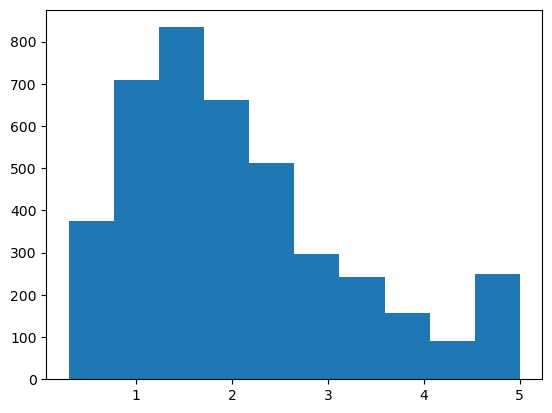

In [54]:
plt.hist(y_test)

In [55]:
rmse=np.sqrt(mean_square_error)

In [56]:
rmse

0.8170684476295914

In [57]:
my target is 0.3 my prediction off on of avg by 0.81
my target  is 5 my predection off on of average by 0.81

SyntaxError: invalid syntax (2635275439.py, line 1)

In [58]:
rmse/(y_test.max()-y_test.min())*100

17.38439806786776

**Scatter plot**

In [59]:
X.shape

(20640, 6)

In [60]:
y.shape

(20640,)

In [61]:
#plt.scatter(X,y) dimension aer not matching so we cant draw

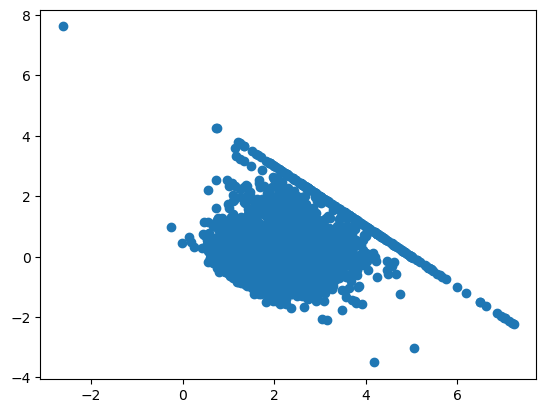

In [62]:
errors=y_test-y_pred
plt.scatter(y_pred,errors)

In [71]:
#dump
import pickle

In [68]:
file=open('linear_regression.pkl','wb')

pickle.dump(lr,file)

In [70]:
with open('linear_regression1.pkl','wb'):
    pickle.dump(lr,file)

In [73]:
#Load the model
file=open('linear_regression.pkl','rb')
loaded_model=pickle.load(file)

In [74]:
file=open('linear_regression1.pkl','wb')
pickle.dump(lr,file)

In [79]:
file=open('linear_regression1.pkl','rb')
pickle.load(file)

LinearRegression()

In [83]:
lr.intercept_ #this means b0


0.3441285795416955

In [81]:
lr.coef_

array([ 6.35658513,  0.89105794,  0.65814186, -5.386109  , -0.39906889,
       -3.84942032])

In [82]:
X_train.columns

Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude', 'AveRooms'], dtype='object')

In [ ]:
y=b0+b1*'MedInc'+b2*'HouseAge'+b3*"Population"+b4*'AveOccup'+b5*'Latitude'+b6*'AveRooms'

In [ ]:
y=lr.intercept_+lr.coef_[0]*'MedInc'+
                lr.coef_[1]*'HouseAge'+
                lr.coef_[2]*'Population'+
                lr.coef_[3]*'AveOccup'+
                lr.coef_[4]*'Latitude'+
                lr.coef_[5]*'AveRooms'

In [86]:
X_test.values[0]

array([2.19396974e-01, 1.00000000e+00, 1.71249194e-02, 8.30820315e-04,
       5.57917109e-01, 2.83714549e-02])

In [95]:
y=lr.intercept_+lr.coef_[0]*2.19396974e-01+ \
                lr.coef_[1]*1.00000000e+00+ \
                lr.coef_[2]*1.71249194e-02+ \
                lr.coef_[3]*8.30820315e-04+ \
                lr.coef_[4]*5.57917109e-01+ \
                lr.coef_[5]*2.83714549e-02

In [96]:
y

2.3047367862073607

In [100]:
y_pred[0]

2.3047367848866993

In [103]:
#our original model :lr
lr.predict(X_test)     # 4k outputs y_pred
#test only one sample
lr.predict([X_test.values[0]])   # 1D 2D y_pred[0]

#test two sample

lr.predict([X_train.values[0],X_test.values[1]])



C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.94473385, 3.26212585])

In [104]:
#Think like client 

In [115]:
loaded_model.predict([[1,2,3,4,5,6]])

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-36.17904717])

## Joblib

In [116]:
import joblib
file_name='Linear_house_model.joblib'
model_name=lr
joblib.dump(model_name,file_name)

['Linear_house_model.joblib']

In [117]:
load_model=joblib.load('Linear_house_model.joblib')

In [118]:
load_model.predict([[12,34,53,21,34,23]])

C:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-73.41265956])